<a href="https://colab.research.google.com/github/ShivenTripathi/Dimensionality-Reduction-CGM/blob/main/Part_3/ColabNotebooks/VanillaXGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CGM
!ls
# !gzip "/content/drive/MyDrive/CGM/dataset/HIGGS_6M.csv.gz" -d "/content/drive/MyDrive/CGM/dataset"

In [ ]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [ ]:
df=pd.read_csv("dataset/HIGGS_6M.csv")
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00.1,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


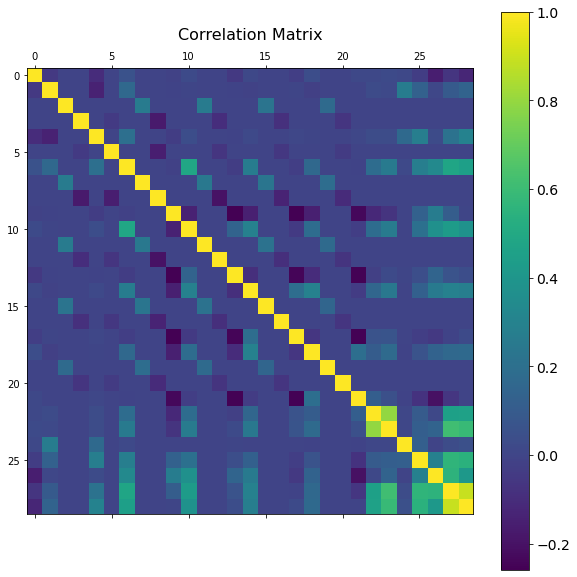

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
dataset = pd.read_csv("dataset/HIGGS_6M.csv").to_numpy()

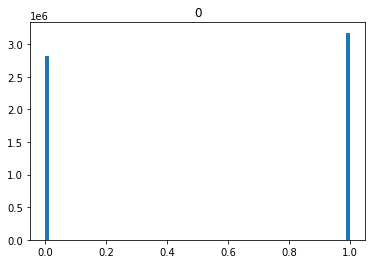

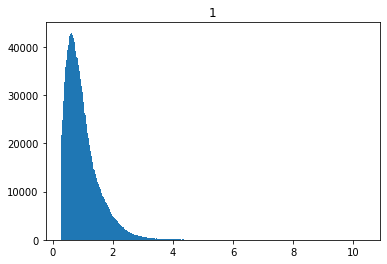

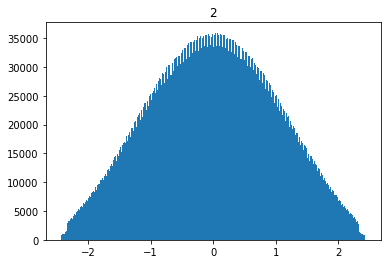

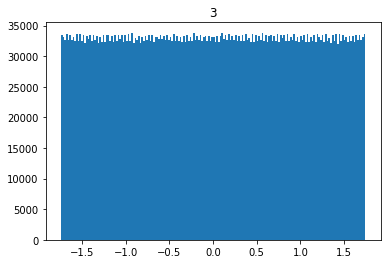

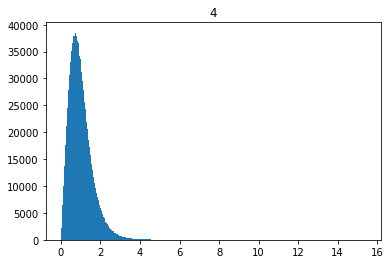

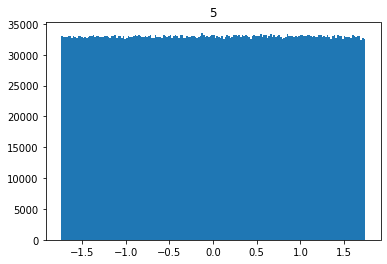

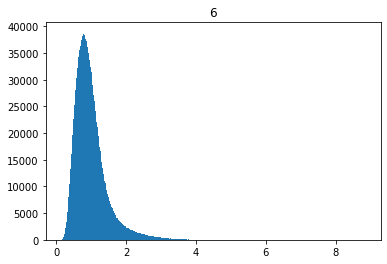

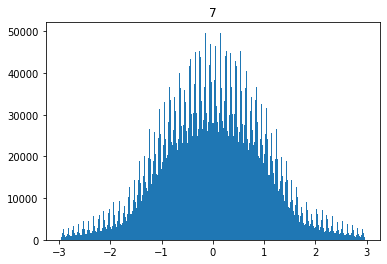

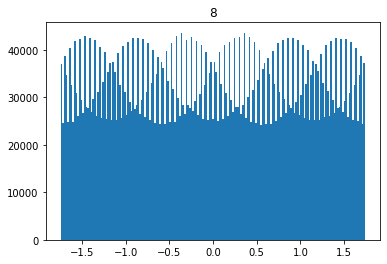

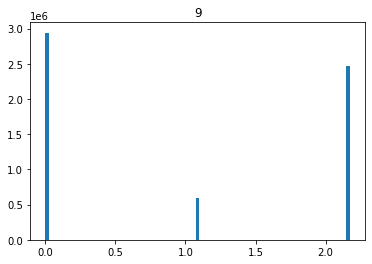

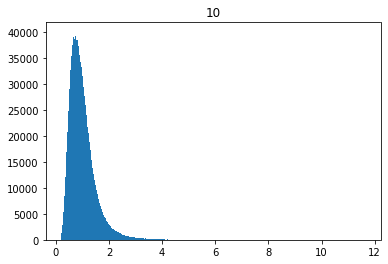

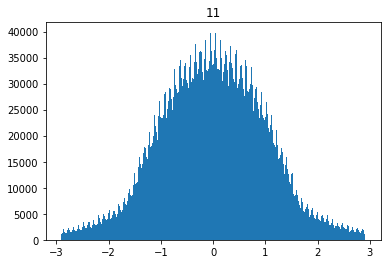

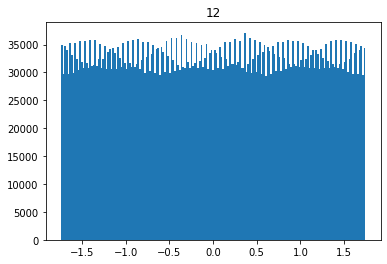

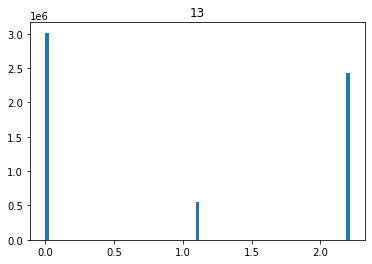

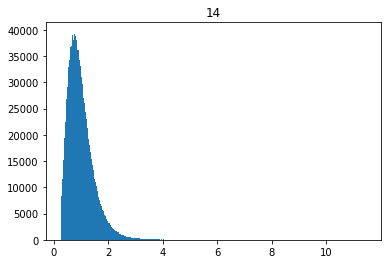

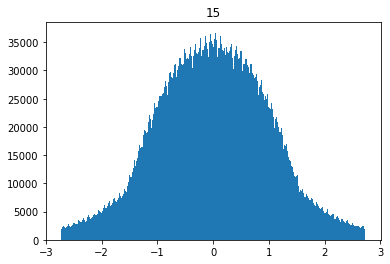

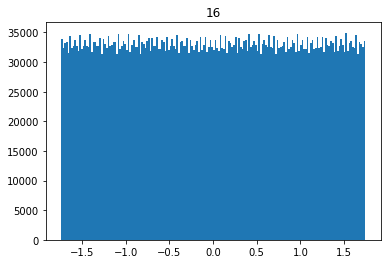

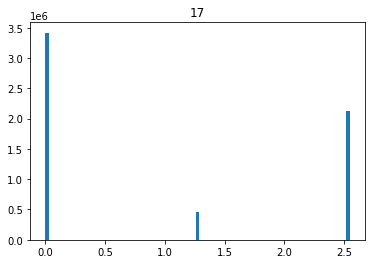

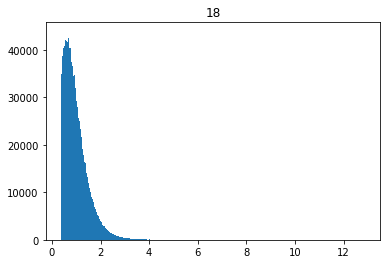

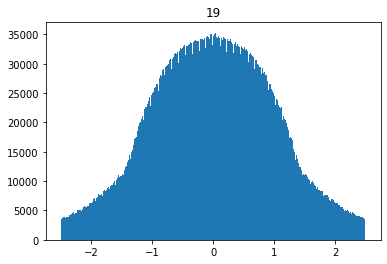

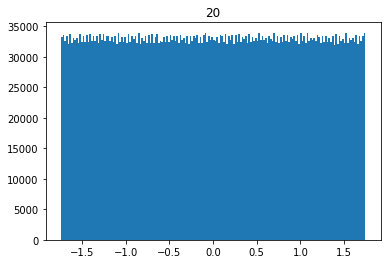

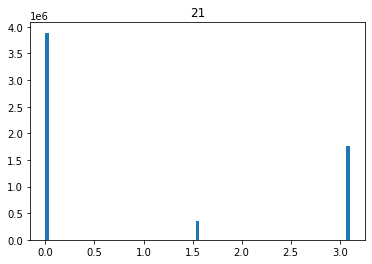

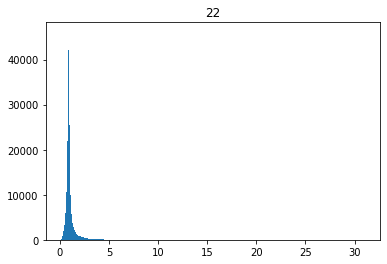

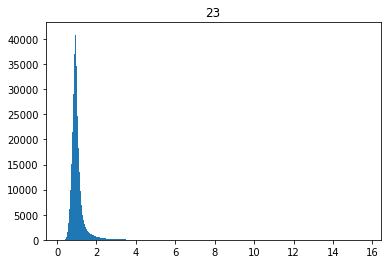

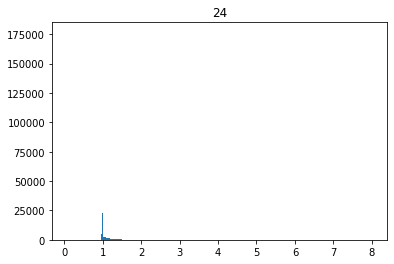

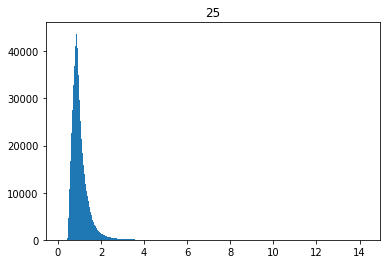

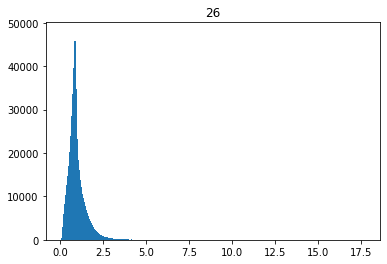

KeyboardInterrupt: ignored

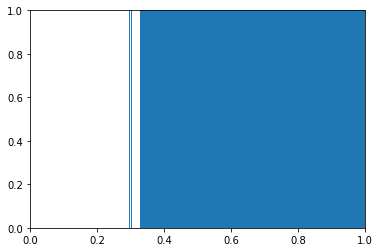

In [ ]:
for i in range(29):
  plt.hist(dataset[:,i],bins='auto')
  plt.title(str(i))
  plt.show()

In [ ]:
X = dataset[:,1:]
Y = dataset[:,0].astype(int)
print(X[0],Y[0])
print(np.shape(X),np.shape(X[0]),np.shape(Y),np.shape(Y[0]))

[ 9.07542109e-01  3.29147279e-01  3.59411865e-01  1.49796987e+00
 -3.13009530e-01  1.09553063e+00 -5.57524920e-01 -1.58822978e+00
  2.17307615e+00  8.12581182e-01 -2.13641927e-01  1.27101457e+00
  2.21487212e+00  4.99993950e-01 -1.26143181e+00  7.32156157e-01
  0.00000000e+00  3.98700893e-01 -1.13893008e+00 -8.19110195e-04
  0.00000000e+00  3.02219898e-01  8.33048165e-01  9.85699654e-01
  9.78098392e-01  7.79732168e-01  9.92355764e-01  7.98342586e-01] 1
(5999999, 28) (28,) (5999999,) ()


# Model on Raw dataset (no preprocessing)

You can skip training, jump to the last cell to load from drive

In [ ]:
seed = 7
test_size = 0.08
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
eval_set = [(X_valid, y_valid)]
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)

[20:38:34] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-auc:0.679592
[1]	validation_0-auc:0.684988
[2]	validation_0-auc:0.688146
[3]	validation_0-auc:0.692478
[4]	validation_0-auc:0.708175
[5]	validation_0-auc:0.71577
[6]	validation_0-auc:0.723524
[7]	validation_0-auc:0.728979
[8]	validation_0-auc:0.730521
[9]	validation_0-auc:0.731517
[10]	validation_0-auc:0.736425
[11]	validation_0-auc:0.736944
[12]	validation_0-auc:0.740219
[13]	validation_0-auc:0.743769
[14]	validation_0-auc:0.745711
[15]	validation_0-auc:0.745926
[16]	validation_0-auc:0.747654
[17]	validation_0-auc:0.749516
[18]	validation_0-auc:0.751581
[19]	validation_0-auc:0.753539
[20]	validation_0-auc:0.755207
[21]	validation_0-auc:0.756212
[22]	validation_0-auc:0.758195
[23]	validation_0-auc:0.759694
[24]	validation_0-auc:0.760278
[25]	validation_0-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.40%


In [ ]:
mod_dataset=dataset
logtransform=[1,4,6,10,14,18,22,23,24,25,26,27,28]
for index in logtransform:
  mod_dataset[:,index]=np.log(mod_dataset[:,index])

In [ ]:
for i in range(29):
  plt.hist(mod_dataset[:,i],bins='auto')
  plt.title(str(i))
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
categorical=[0,9,13,17,21]
non_categorical=[]
for i in range(29):
  if i not in categorical:
    non_categorical.append(i)
print(non_categorical)

In [ ]:
for index in non_categorical:
  mod_dataset[:,index]=scaler.fit_transform(mod_dataset[:,index].reshape(-1,1)).reshape(-1)

In [ ]:
for i in range(29):
  plt.hist(mod_dataset[:,i],bins='auto')
  plt.title(str(i))
  plt.show()

In [ ]:
X = mod_dataset[:,1:]
Y = mod_dataset[:,0].astype(int)
print(X[0],Y[0])
print(np.shape(X),np.shape(X[0]),np.shape(Y),np.shape(Y[0]))

[ 9.91932443e-02  3.26245081e-01  3.56807259e-01  8.94439464e-01
 -3.11098036e-01  4.54615981e-01 -5.51916670e-01 -1.57885773e+00
  2.17307615e+00 -1.99794457e-01 -2.11991992e-01  1.26350201e+00
  2.21487212e+00 -1.24524704e+00 -1.25092734e+00  7.27702034e-01
  0.00000000e+00 -1.69832846e+00 -1.13024130e+00 -8.23977171e-04
  0.00000000e+00 -2.77900602e+00 -6.04251123e-01 -4.34355339e-01
  8.12042371e-02 -1.89601671e-01  2.57272610e-02 -5.25906146e-01] 1
(5999999, 28) (28,) (5999999,) ()


# Model on Processed Dataset

  * To some features logarithm transform applied
  * Standard Scaled
  * Min Max Scaled
  * Categorical features rounded to integers


You can skip training, jump to the last cell to load from drive

In [ ]:
seed = 7
test_size = 0.08
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
eval_set = [(X_valid, y_valid)]
model = XGBClassifier()
eval_set = [(X_valid, y_valid)]
model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)

In [ ]:
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.38%


{'validation_0': {'auc': [0.679592, 0.68499, 0.687248, 0.691798, 0.708075, 0.709898, 0.722665, 0.723656, 0.729072, 0.733647, 0.734079, 0.737091, 0.740615, 0.74296, 0.745188, 0.747834, 0.748963, 0.750014, 0.752192, 0.753838, 0.754897, 0.756489, 0.758168, 0.759406, 0.760729, 0.762003, 0.763188, 0.763876, 0.765118, 0.765563, 0.76654, 0.767364, 0.768302, 0.768978, 0.769943, 0.770313, 0.771099, 0.771922, 0.772615, 0.773035, 0.773421, 0.773835, 0.774293, 0.77491, 0.775118, 0.775384, 0.775844, 0.77643, 0.776753, 0.777219, 0.777556, 0.778001, 0.778301, 0.779054, 0.779275, 0.779472, 0.780207, 0.780469, 0.780745, 0.781102, 0.78121, 0.781446, 0.781914, 0.78219, 0.782477, 0.782645, 0.782943, 0.783189, 0.783428, 0.783651, 0.783935, 0.784048, 0.784195, 0.784507, 0.784786, 0.784964, 0.785211, 0.785401, 0.785639, 0.785742, 0.785923, 0.786196, 0.78641, 0.78677, 0.78718, 0.787388, 0.78755, 0.787582, 0.787816, 0.788135, 0.788397, 0.788557, 0.788672, 0.789009, 0.789217, 0.78939, 0.789482, 0.78959, 0.78973

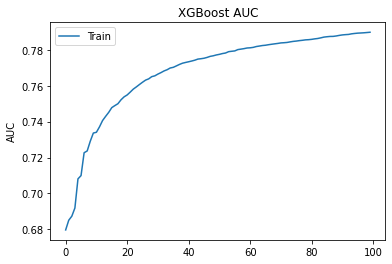

In [ ]:
from matplotlib import pyplot

results = model.evals_result()
print(results)
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

# Load Model from Drive

In [ ]:
import pickle
pickle.dump(model, open("xgb.pickle.dat", "wb"))

In [ ]:
"""
Checking whether load and save is working okay
"""
loaded_model = pickle.load(open("xgb.pickle.dat", "rb"))
y_pred = loaded_model.predict(X_valid)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
"""
too slow abandoned after 10 minutes
"""
# df = pd.DataFrame(dataset, columns=np.arange(29)).sample(10)
# sns.pairplot(df)

In [ ]:
"""
took too long to run, abandoned after 14 minutes
"""
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# knn=KNeighborsClassifier(n_neighbors=2)
# knn.fit(X_train,y_train)
# y_pred=knn.predict(X_valid)
# score=metrics.accuracy_score(y_valid,y_pred)
# print(score)